In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.mlab as mlab
import pandas as pd
#import mpl_toolkits.basemap
#from mpl_toolkits.basemap import Basemap
#from mpl_toolkits import mplot3d
#from netCDF4 import Dataset as ds
from urllib import request
import scipy as sp
import scipy.stats as st
from scipy import stats as stt
from sklearn import datasets, linear_model
from sklearn.neighbors import KernelDensity as kd
from sklearn.linear_model import LinearRegression
from random import randint
from scipy.stats import norm
#import statsmodels
import sklearn
import math
import statistics
import sympy as sy
from sympy import symbols, diff
#import statsmodels.api as sm
from datetime import date
from scipy.stats import norm, kurtosis
from sklearn.linear_model import LinearRegression
#import seaborn as sns
import statsmodels.api as sm 
import pylab as py 
from scipy.stats import norm, t
from scipy.integrate import quad
import warnings
warnings.filterwarnings("ignore")

In [3]:
'''
path_to_file = '/Users/khalidzubaidi/Downloads/BDA-Graduate/BDA596-DataScience-Project'
with open(path_to_file,'rb') as f:
    contents = f.read()
contents = contents.rstrip("\n").decode("utf-16")
contents = contents.split("\r\n")
'''

'\npath_to_file = \'/Users/khalidzubaidi/Downloads/BDA-Graduate/BDA596-DataScience-Project\'\nwith open(path_to_file,\'rb\') as f:\n    contents = f.read()\ncontents = contents.rstrip("\n").decode("utf-16")\ncontents = contents.split("\r\n")\n'

In [4]:
headerList = ['DR_NO','Date Rptd','DATE OCC','TIME OCC','AREA','AREA NAME','Rpt Dist No','Part 1-2','Crm Cd','Crm Cd Desc','Mocodes','Vict Age','Vict Sex','Vict Descent','Premis Cd','Premis Desc','Weapon Used Cd','Weapon Desc','Status','Status Desc','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','LOCATION','Cross Street','LAT','LON']

In [5]:
LA19 = "LACrime_Data_from_2010_to_2019_2.csv"
LA19Data = pd.read_csv(LA19, header=None)
LA19Data.columns = headerList
LA19Data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,150517906,11/10/15 0:00,11/10/15 0:00,2000,5,Harbor,525,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,500 GULF AV,NaN,33.7751,-118.2725
1,150806126,2/22/15 0:00,2/21/15 0:00,30,8,West LA,884,2,903,CONTEMPT OF COURT,...,AO,Adult Other,903.0,NaN,NaN,NaN,11000 TENNESSEE AV,NaN,34.0403,-118.4340
2,150917735,10/4/15 0:00,10/4/15 0:00,2350,9,Van Nuys,911,1,210,ROBBERY,...,AA,Adult Arrest,210.0,NaN,NaN,NaN,6800 SEPULVEDA BL,NaN,34.1938,-118.4702
3,150916797,9/14/15 0:00,8/4/15 0:00,1200,9,Van Nuys,923,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,15000 ARCHWOOD ST,NaN,34.1930,-118.4603
4,151521646,11/13/15 0:00,11/13/15 0:00,1600,15,N Hollywood,1527,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,AA,Adult Arrest,440.0,NaN,NaN,NaN,11000 VICTORY BL,NaN,34.1867,-118.3703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838149,190506304,2/22/19 0:00,2/22/19 0:00,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
838150,190608903,3/28/19 0:00,3/28/19 0:00,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
838151,190715222,8/15/19 0:00,8/14/19 0:00,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),...,IC,Invest Cont,331.0,NaN,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732
838152,201308660,3/25/20 0:00,3/25/20 0:00,530,13,Newton,1352,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 43RD PL,NaN,34.0048,-118.2720


In [6]:
LA19DataHead = LA19Data.columns.values.tolist()
LA19DataHead

['DR_NO',
 'Date Rptd',
 'DATE OCC',
 'TIME OCC',
 'AREA',
 'AREA NAME',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'Premis Cd',
 'Premis Desc',
 'Weapon Used Cd',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'LOCATION',
 'Cross Street',
 'LAT',
 'LON']

In [7]:
LA19Data = pd.DataFrame(LA19Data)
clean_LA19Data = LA19Data.drop(columns=['DR_NO', 'Date Rptd', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'])
Nan_LA19Data = clean_LA19Data.dropna()
Nan_LA19Data

,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,LOCATION,Cross Street,LAT,LON
7,9/7/15 0:00,Southwest,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",60,M,H,ADAMS,VICTORIA,34.0326,-118.3374
11,2/8/15 0:00,Rampart,INTIMATE PARTNER - SIMPLE ASSAULT,23,F,H,RAMPART BL,TEMPLE ST,34.0725,-118.2748
14,9/27/15 0:00,Newton,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",18,M,B,SLAUSON,CENTRAL,33.9893,-118.2564
25,8/30/15 0:00,Wilshire,INTIMATE PARTNER - SIMPLE ASSAULT,35,F,H,3RD,FAIRFAX,34.0716,-118.3614
30,5/6/15 0:00,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),27,M,B,RADFORD,HAMLIN,34.1888,-118.3921
...,...,...,...,...,...,...,...,...,...,...
838136,4/7/20 0:00,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",19,F,B,LA SALLE AV,CENTURY BL,33.9455,-118.3057
838139,7/5/19 0:00,Central,BURGLARY FROM VEHICLE,22,M,O,BEAUDRY,ALPINE,34.0674,-118.2476
838140,1/12/19 0:00,Hollenbeck,ROBBERY,15,M,H,4TH ST,MATHEWS,34.0401,-118.2106
838146,4/5/20 0:00,N Hollywood,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),27,M,H,SHERMAN WY,FULTON AV,34.2012,-118.4225


In [8]:
Nan_LA19Data[["month", "day", "year"]] = Nan_LA19Data["DATE OCC"].str.split("/", expand = True)
Nan__LA19Data = Nan_LA19Data[~(Nan_LA19Data['year'] < '19')]
Nan__LA19Data

,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,LOCATION,Cross Street,LAT,LON,month,day,year
449919,1/9/19 0:00,Pacific,CHILD ANNOYING (17YRS & UNDER),15,F,W,NATIONAL,MOTOR,34.0292,-118.4107,1,9,19 0:00
450988,3/30/19 0:00,Foothill,FAILURE TO YIELD,0,M,W,CLAYBECK,KESWICK,34.2107,-118.3496,3,30,19 0:00
461461,5/16/19 0:00,Southeast,ROBBERY,33,M,H,CENTURY,MAIN,33.9456,-118.2739,5,16,19 0:00
462306,5/3/19 0:00,Foothill,OTHER MISCELLANEOUS CRIME,0,M,O,TUXFORD,BRADLEY,34.2306,-118.3768,5,3,19 0:00
486955,10/9/19 0:00,77th Street,BATTERY - SIMPLE ASSAULT,38,M,H,82ND,HOOVER,33.9643,-118.2871,10,9,19 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838136,4/7/20 0:00,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",19,F,B,LA SALLE AV,CENTURY BL,33.9455,-118.3057,4,7,20 0:00
838139,7/5/19 0:00,Central,BURGLARY FROM VEHICLE,22,M,O,BEAUDRY,ALPINE,34.0674,-118.2476,7,5,19 0:00
838140,1/12/19 0:00,Hollenbeck,ROBBERY,15,M,H,4TH ST,MATHEWS,34.0401,-118.2106,1,12,19 0:00
838146,4/5/20 0:00,N Hollywood,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),27,M,H,SHERMAN WY,FULTON AV,34.2012,-118.4225,4,5,20 0:00


In [9]:
#Nan_LA19Data['DATE OCC'] = Nan_LA19Data['DATE OCC'].str.replace(to_replace)
#Nan_LA19Data

In [10]:
LA20 = 'Crime_Data_from_2020_to_Present.csv'
LA20Data = pd.read_csv(LA20)
#LA20Data

In [11]:
LADataHead = LA20Data.columns.values.tolist()
LADataHead

['DR_NO',
 'Date Rptd',
 'DATE OCC',
 'TIME OCC',
 'AREA',
 'AREA NAME',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'Premis Cd',
 'Premis Desc',
 'Weapon Used Cd',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'LOCATION',
 'Cross Street',
 'LAT',
 'LON']

In [79]:
LA20Data = pd.DataFrame(LA20Data)
clean_LAData = LA20Data.drop(columns=['DR_NO', 'Date Rptd', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LAT', 'LON'])
clean_LA20Data = clean_LAData.dropna()
clean_LA20Data

,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,LOCATION
0,01/08/2020 12:00:00 AM,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,1100 W 39TH PL
1,01/01/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,25,M,H,700 S HILL ST
2,09/16/2020 12:00:00 AM,77th Street,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,700 E 73RD ST
3,01/01/2020 12:00:00 AM,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,5400 CORTEEN PL
4,01/01/2020 12:00:00 AM,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,14400 TITUS ST
...,...,...,...,...,...,...,...
347385,07/04/2021 12:00:00 AM,Topanga,BATTERY - SIMPLE ASSAULT,44,M,W,23100 FRIAR ST
347386,08/28/2021 12:00:00 AM,Wilshire,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,M,O,8700 W 3RD ST
347387,08/10/2021 12:00:00 AM,N Hollywood,INTIMATE PARTNER - SIMPLE ASSAULT,38,F,H,VICTORY
347389,03/04/2021 12:00:00 AM,Harbor,FALSE IMPRISONMENT,41,F,B,200 W 2ND ST


In [82]:
#clean_LA20Data[["month", "day", "year"]] = clean_LA20Data["DATE OCC"].str.split("/", expand = True)
#clean_LA20Data = clean_LA20Data[~(clean_LA20Data['year'] == '2021')]
#clean_LA20Data

,DATE OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,LOCATION,month,day,year
0,01/08/2020 12:00:00 AM,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,1100 W 39TH PL,01,08,2020 12:00:00 AM
1,01/01/2020 12:00:00 AM,Central,BATTERY - SIMPLE ASSAULT,25,M,H,700 S HILL ST,01,01,2020 12:00:00 AM
2,09/16/2020 12:00:00 AM,77th Street,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,700 E 73RD ST,09,16,2020 12:00:00 AM
3,01/01/2020 12:00:00 AM,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,5400 CORTEEN PL,01,01,2020 12:00:00 AM
4,01/01/2020 12:00:00 AM,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,14400 TITUS ST,01,01,2020 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...
347385,07/04/2021 12:00:00 AM,Topanga,BATTERY - SIMPLE ASSAULT,44,M,W,23100 FRIAR ST,07,04,2021 12:00:00 AM
347386,08/28/2021 12:00:00 AM,Wilshire,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,M,O,8700 W 3RD ST,08,28,2021 12:00:00 AM
347387,08/10/2021 12:00:00 AM,N Hollywood,INTIMATE PARTNER - SIMPLE ASSAULT,38,F,H,VICTORY,08,10,2021 12:00:00 AM
347389,03/04/2021 12:00:00 AM,Harbor,FALSE IMPRISONMENT,41,F,B,200 W 2ND ST,03,04,2021 12:00:00 AM


In [13]:
Nan_LA19Data.columns.values.tolist()

['DATE OCC',
 'AREA NAME',
 'Crm Cd Desc',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'LOCATION',
 'Cross Street',
 'LAT',
 'LON',
 'month',
 'day',
 'year']

In [14]:
clean_LA20Data.columns.values.tolist()

['DATE OCC',
 'AREA NAME',
 'Crm Cd Desc',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'LOCATION']

In [15]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [16]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [17]:
def histogram(data, n_bins, cumulative=False, x_label = "", y_label = "", title = ""):
    _, ax = plt.subplots()
    ax.hist(data, n_bins = n_bins, cumulative = cumulative, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

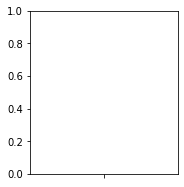

In [18]:
names = ['','']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [19]:
length = len(Nan_LA19Data['Crm Cd Desc'])
length1 = length/2
length1

65051.0

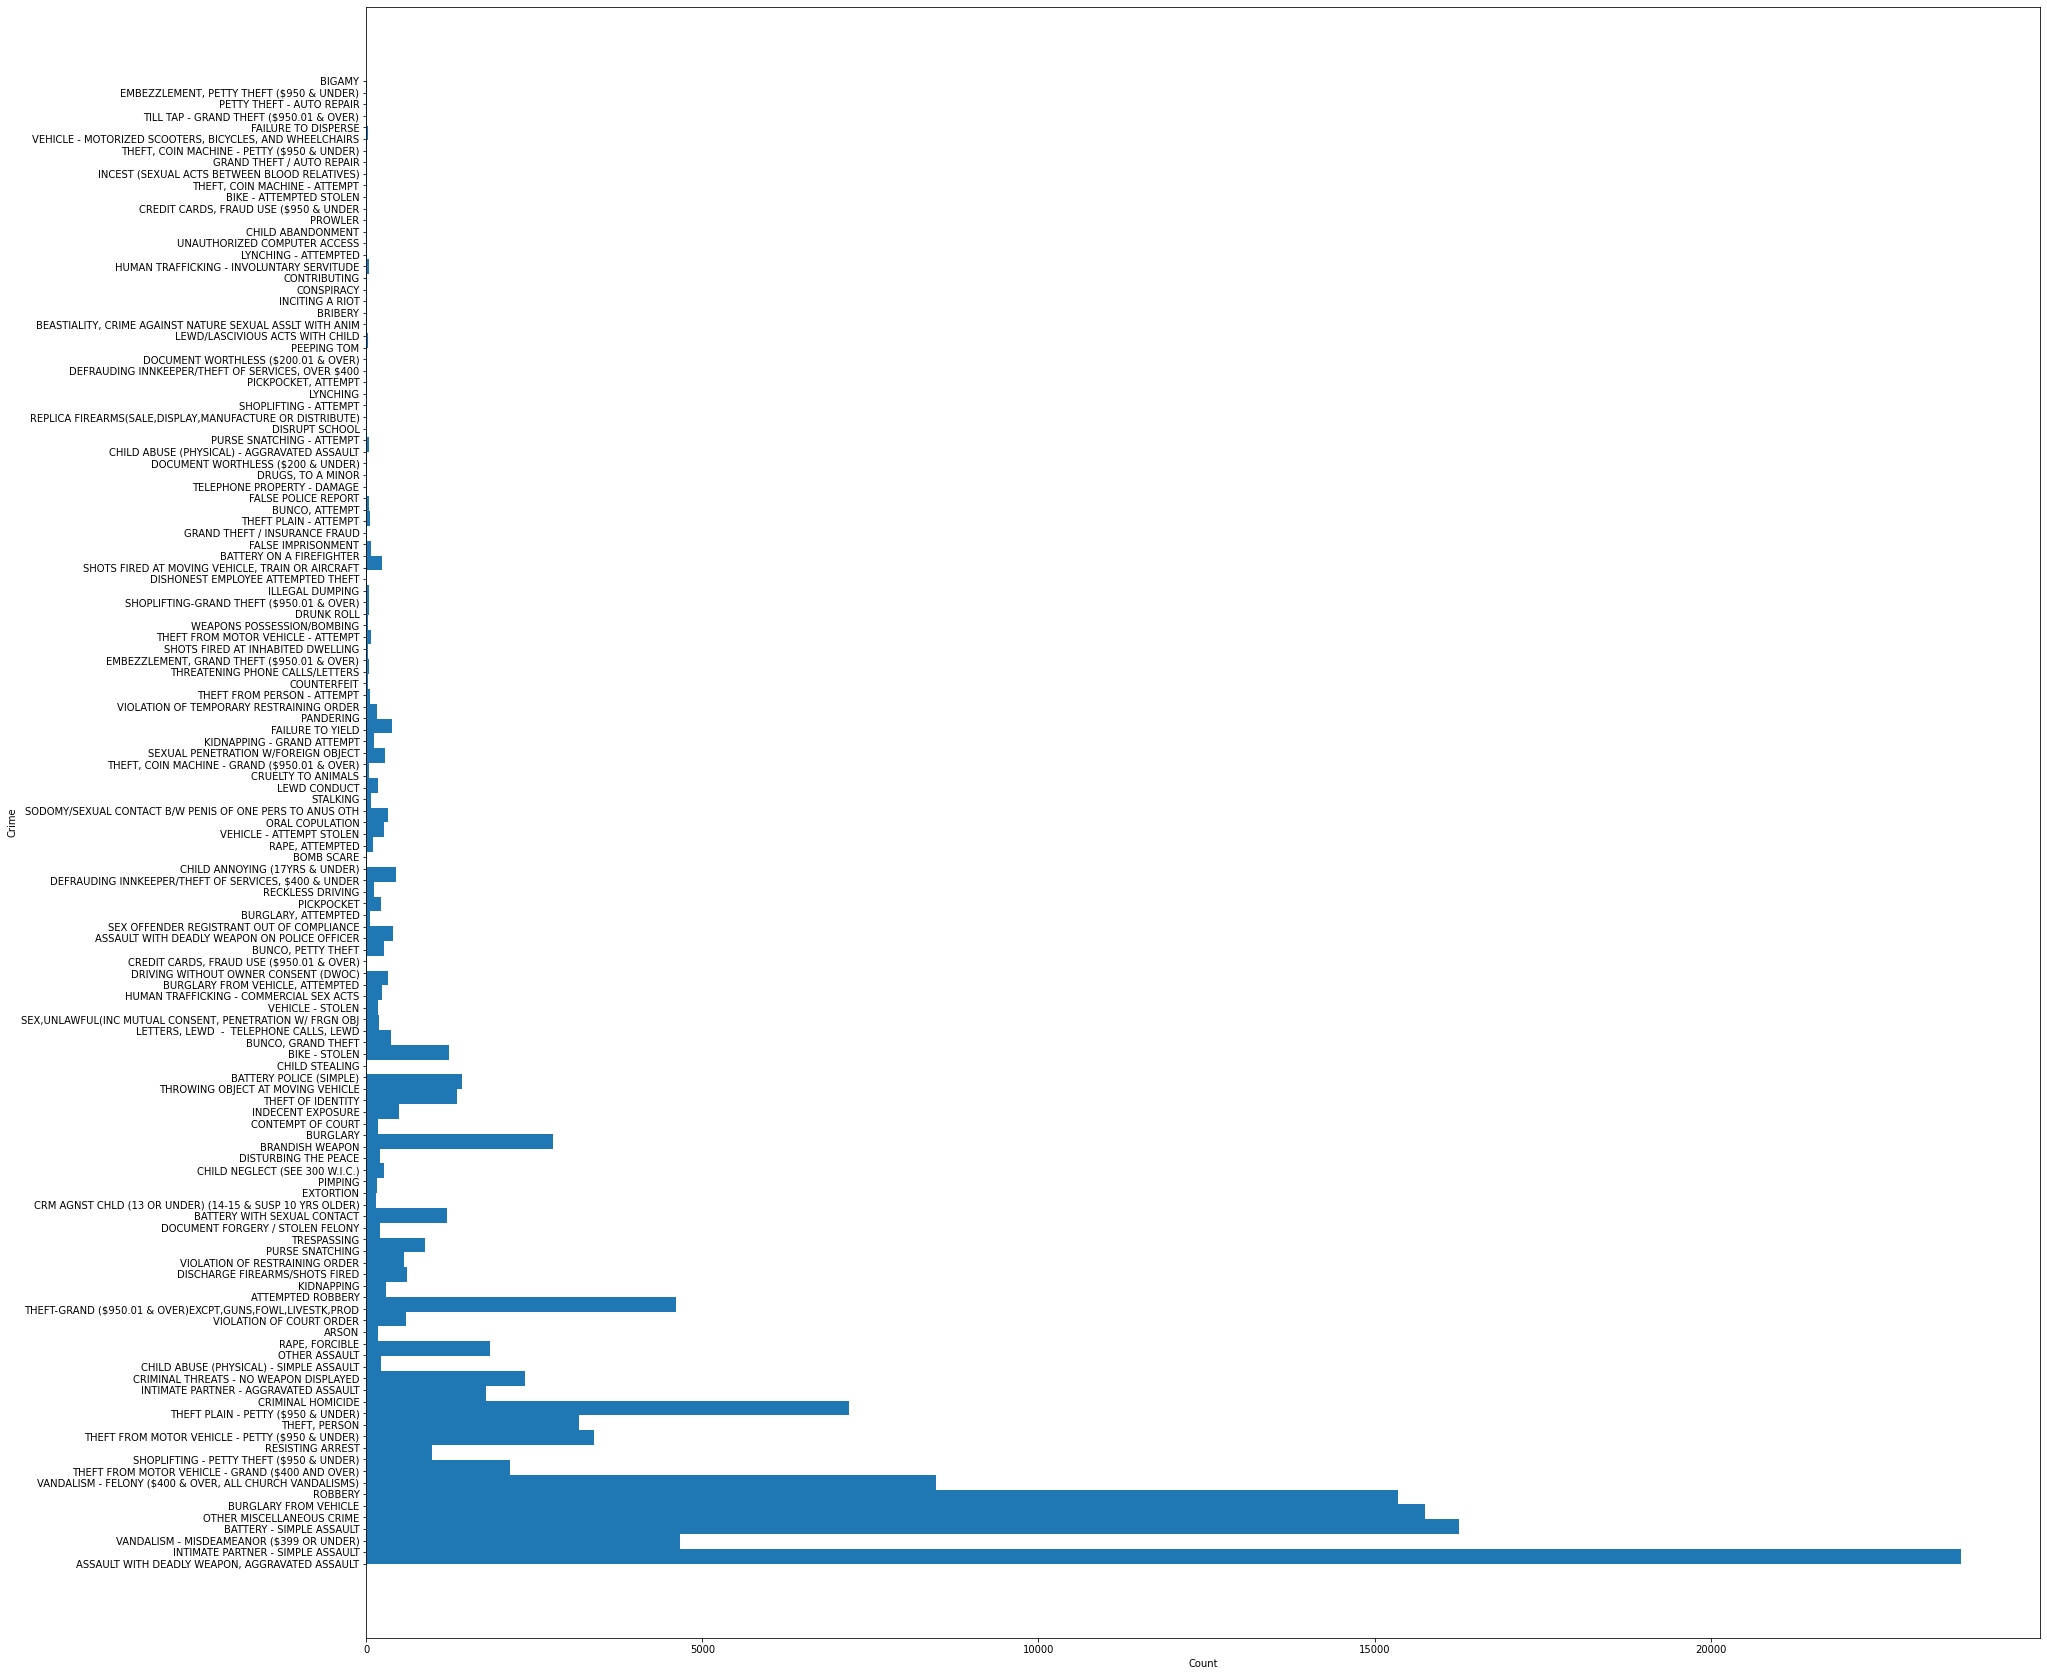

In [20]:
plt.figure(figsize=(30, 30))
plt.hist(Nan_LA19Data['Crm Cd Desc'], bins=100, linewidth=2, orientation='horizontal')
plt.xlabel('Count')
plt.ylabel('Crime')
plt.show()

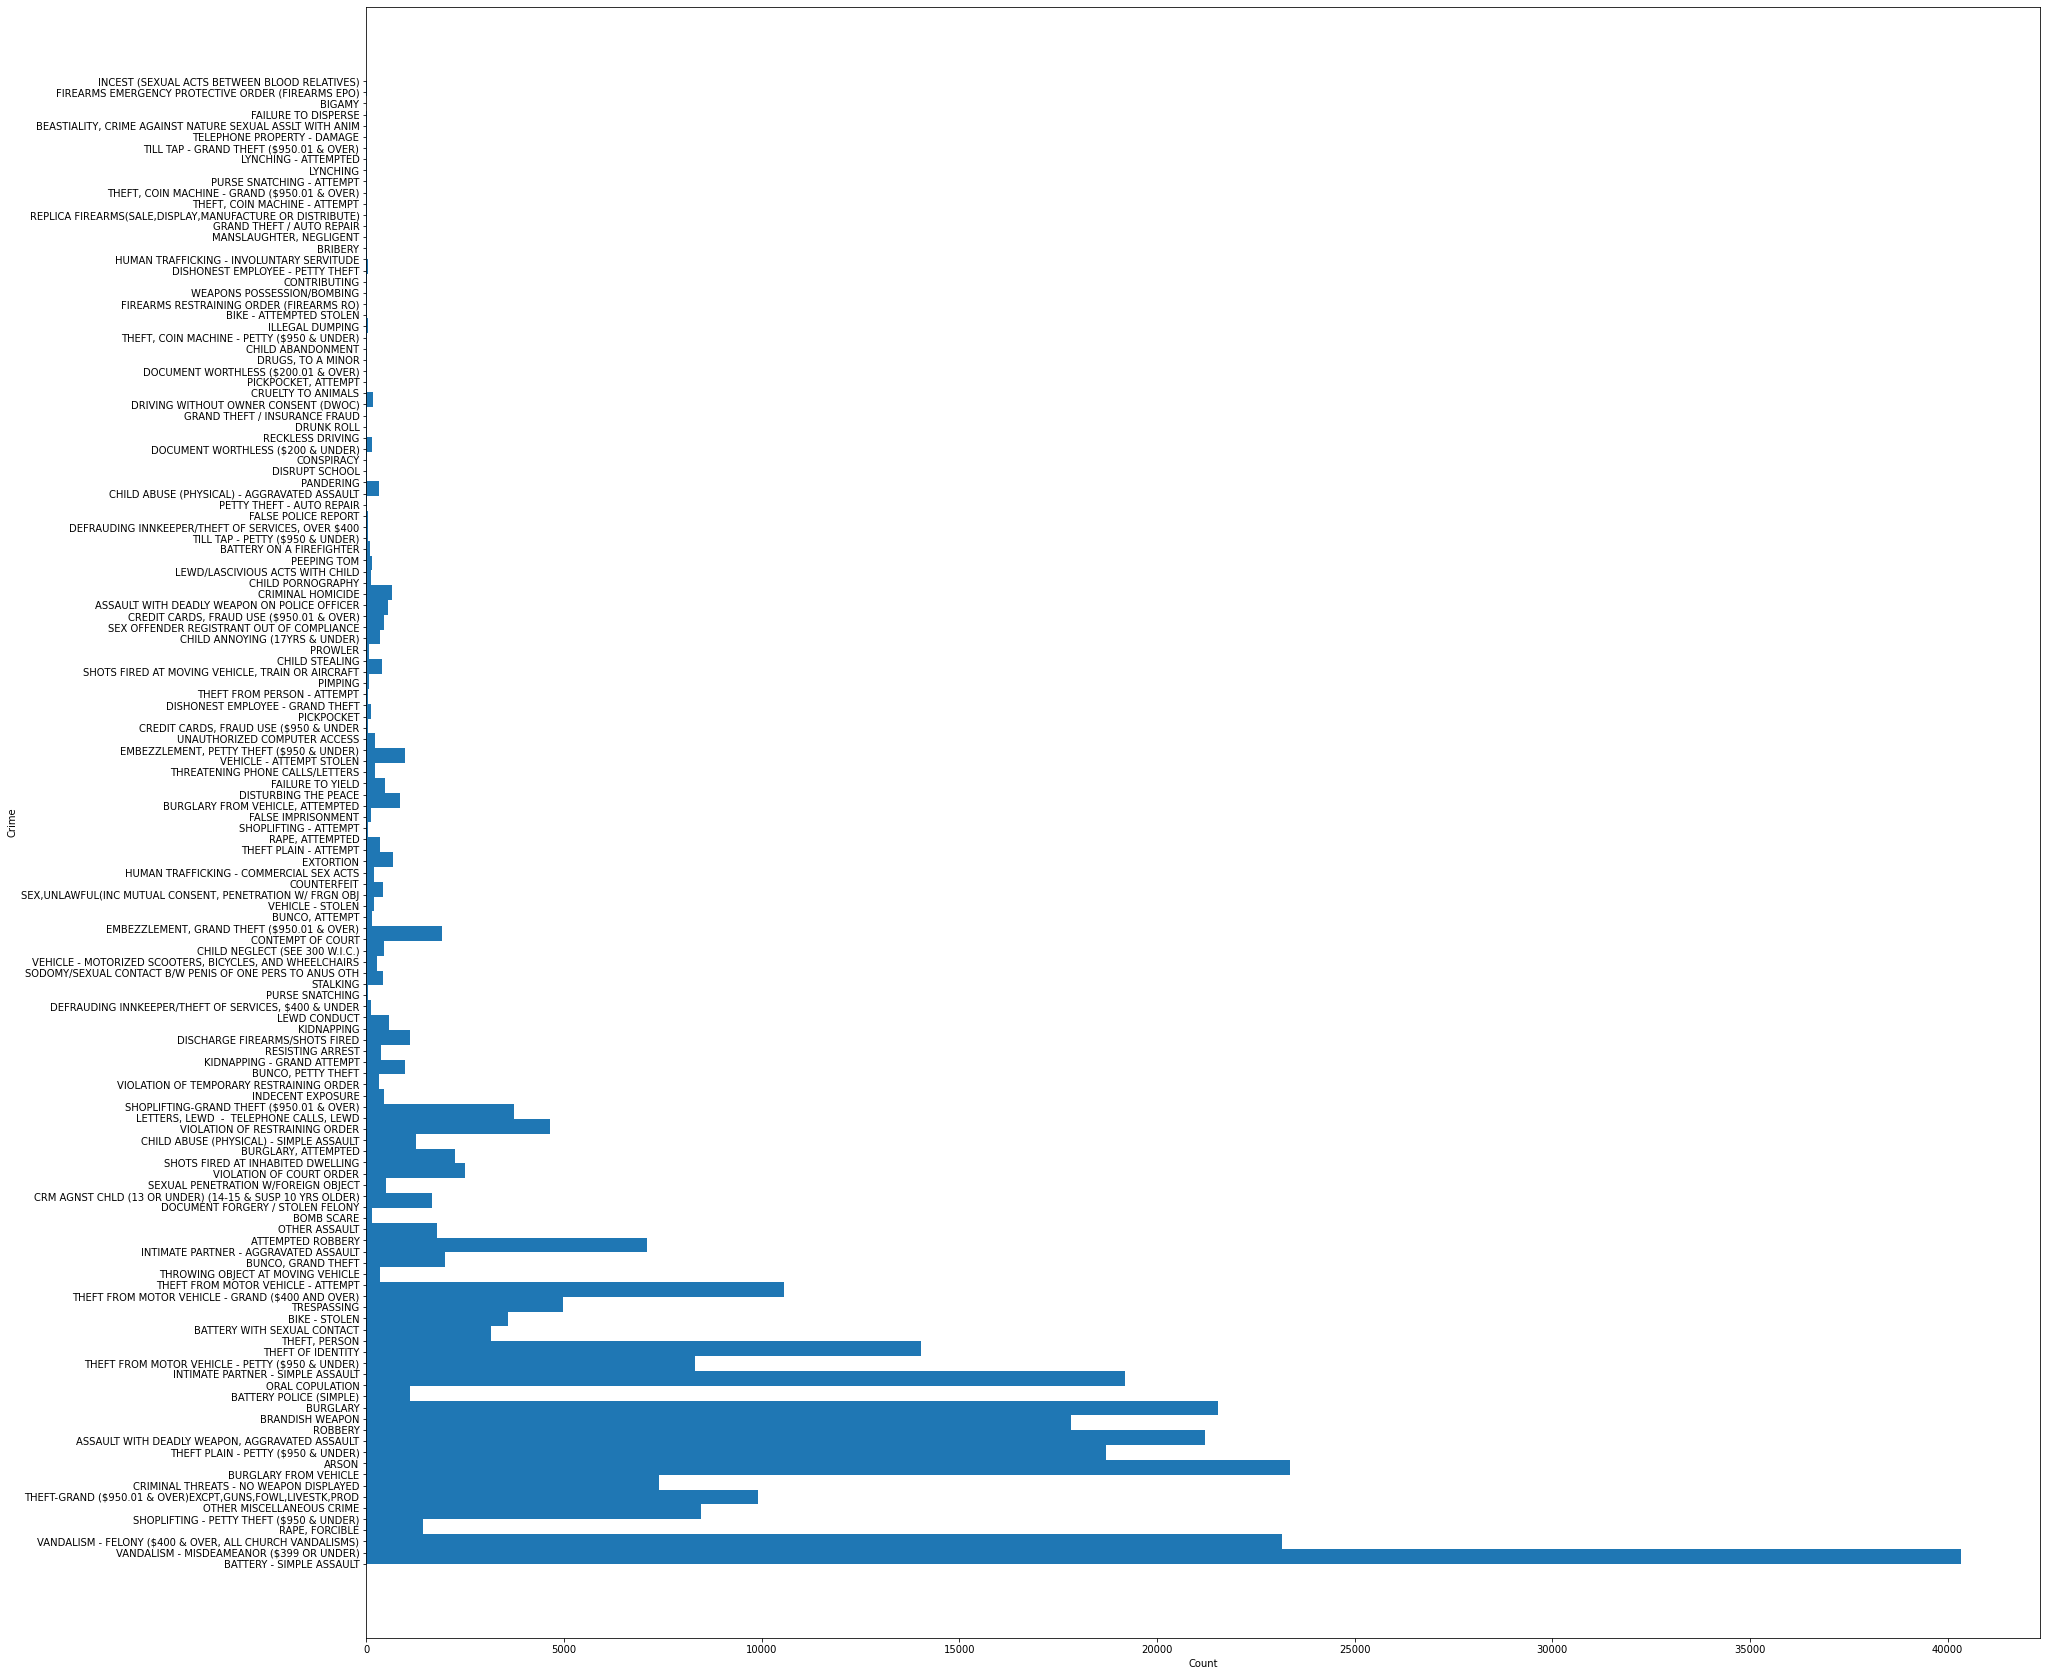

In [21]:
plt.figure(figsize=(30, 30))
plt.hist(clean_LA20Data['Crm Cd Desc'], bins=100, linewidth=2, orientation='horizontal')
plt.xlabel('Count')
plt.ylabel('Crime')
plt.show()

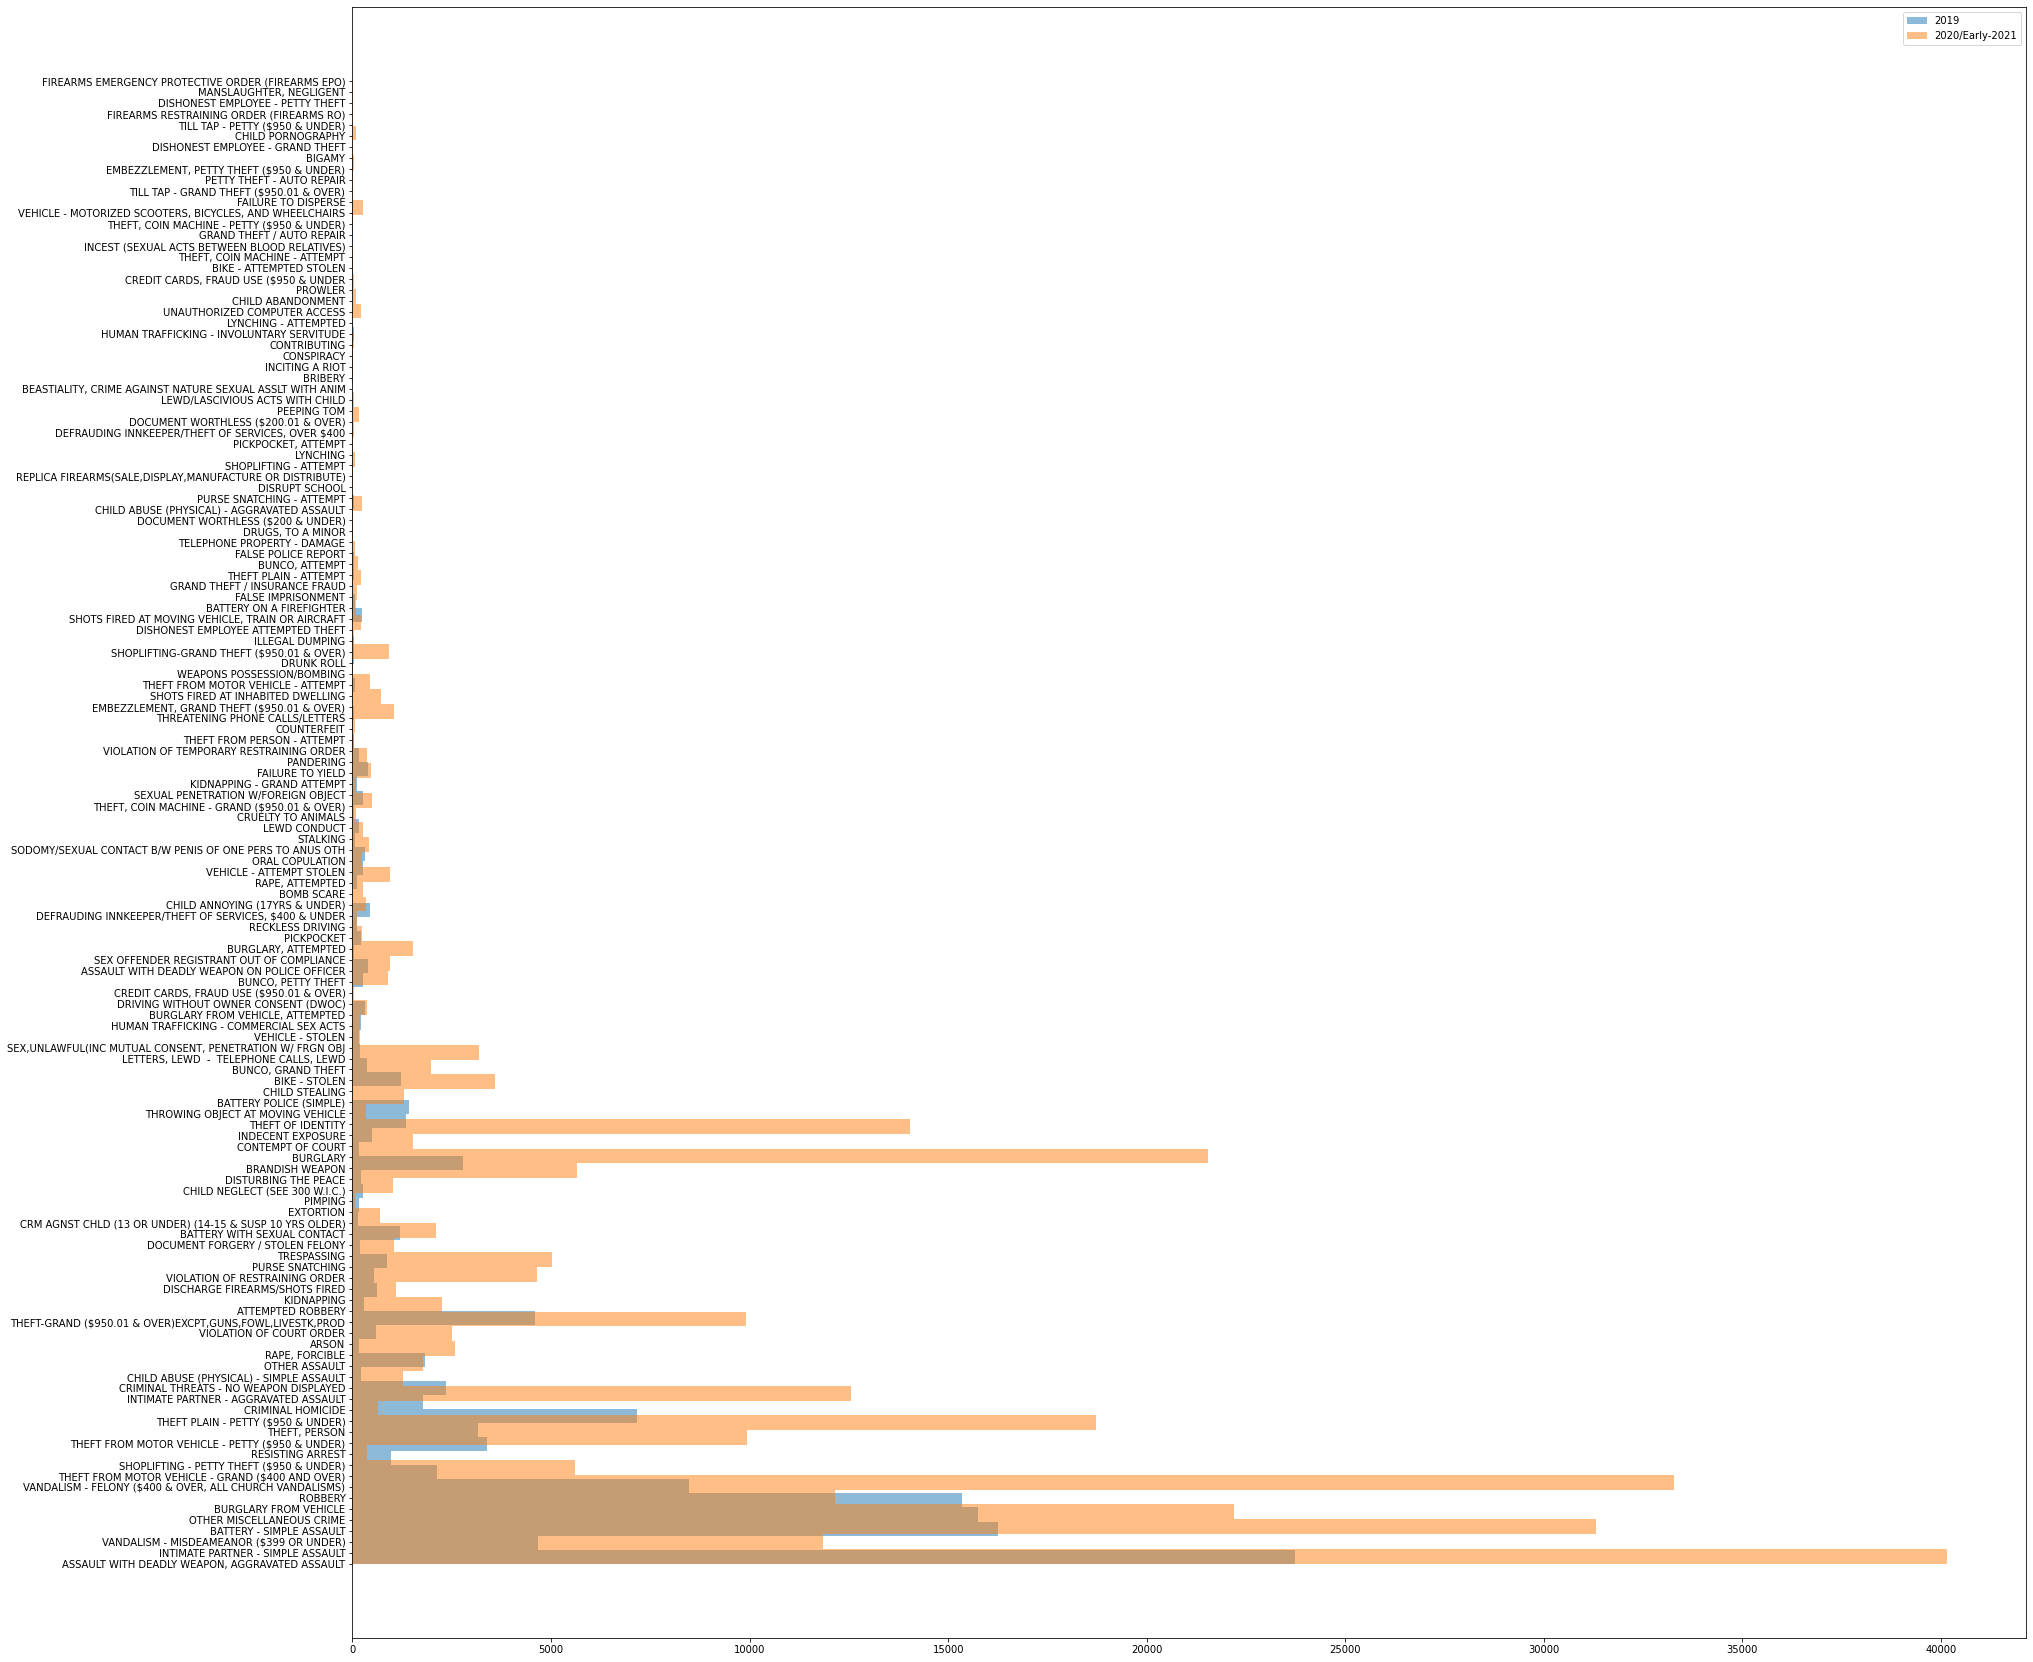

In [22]:
Year_2019 = Nan_LA19Data['Crm Cd Desc']
Year_2020_2021 = clean_LA20Data['Crm Cd Desc']

bins = 100

plt.figure(figsize=(30, 30))
plt.hist(Year_2019, bins, alpha=0.5, label='2019', orientation='horizontal')
plt.hist(Year_2020_2021, bins, alpha=0.5, label='2020/Early-2021', orientation='horizontal')
plt.legend(loc='upper right')
plt.show()

In [23]:
h19 = len(Year_2019)
h21 = len(Year_2020_2021)
#subplot1 = fig.add_subplot(2, 3, 1)
#subplot2 = fig.add_subplot(2, 3, 2)
#plt.figure(figsize=(40, 30))
#plt.bar(Year_2019, h19, color="red", alpha=0.5, label='2019')
#plt.bar(Year_2020_2021, h21, color="blue", alpha=0.5, label='2020/Early-2021')
#plt.xlabel("Crime Count")
#plt.ylabel("Crimes")
#plt.show()

In [38]:
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

li1 = Nan_LA19Data['Crm Cd Desc'].unique()
li2 = clean_LA20Data['Crm Cd Desc'].unique()

print(Diff(li1, li2))
print(" ")
print(Diff(li2, li1))

re1 = set(li1) - set(li2)
re2 = set(li2) - set(li1)

print(" ")
print("list1 - list2")
print(re1)
print(" ")
print("list2 - list1")
print(re2)

['INCITING A RIOT', 'DISHONEST EMPLOYEE ATTEMPTED THEFT', 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 'DISHONEST EMPLOYEE - GRAND THEFT', 'TILL TAP - PETTY ($950 & UNDER)', 'CHILD PORNOGRAPHY', 'DISHONEST EMPLOYEE - PETTY THEFT', 'MANSLAUGHTER, NEGLIGENT', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)']
 
['FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 'DISHONEST EMPLOYEE - GRAND THEFT', 'TILL TAP - PETTY ($950 & UNDER)', 'CHILD PORNOGRAPHY', 'DISHONEST EMPLOYEE - PETTY THEFT', 'MANSLAUGHTER, NEGLIGENT', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 'INCITING A RIOT', 'DISHONEST EMPLOYEE ATTEMPTED THEFT']
 
list1 - list2
{'INCITING A RIOT', 'DISHONEST EMPLOYEE ATTEMPTED THEFT'}
 
list2 - list1
{'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 'DISHONEST EMPLOYEE - GRAND THEFT', 'TILL TAP - PETTY ($950 & UNDER)', 'CHILD PORNOGRAPHY', 'DISHONEST EMPLOYEE - PETTY THEFT', 'MANSLAUGHTER, NEGLIGENT', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)'}


In [24]:
file_name = "LA19_Data"
Nan_LA19Data.to_csv(file_name, sep='\t')

In [25]:
Nan_LA19Data.to_csv(r'.\Users\khalidzubaidi\Downloads\LA19_Data.csv', index=False)

In [26]:
Nan_LA19Data.to_csv('LA19_Data.csv')

In [31]:
file_name2 = "LA20_Data.csv"
clean_LA20Data.to_csv(file_name2)

In [30]:
clean_LA20Data.to_csv(r'.\Users\khalidzubaidi\Downloads\LA19_Data.csv', index=False)

In [32]:
Nan_LA19Data['Crm Cd Desc'].unique()

array(['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'BATTERY - SIMPLE ASSAULT', 'OTHER MISCELLANEOUS CRIME',
       'BURGLARY FROM VEHICLE', 'ROBBERY',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'RESISTING ARREST',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 'THEFT, PERSON',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'CRIMINAL HOMICIDE',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'OTHER ASSAULT',
       'RAPE, FORCIBLE', 'ARSON', 'VIOLATION OF COURT ORDER',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'ATTEMPTED ROBBERY', 'KIDNAPPING',
       'DISCHARGE FIREARMS/SHOTS FIRED', 'VIOLATION OF RESTRAINING OR

In [63]:
Nan_LA19Data['category'] = "Other"

Nan_LA19Data.loc[Nan_LA19Data["Crm Cd Desc"].isin(['THEFT, PERSON','VANDALISM - MISDEAMEANOR ($399 OR UNDER)','PURSE SNATCHING','THROWING OBJECT AT MOVING VEHICLE','THEFT FROM PERSON - ATTEMPT','BIKE - ATTEMPTED STOLEN',
                                                     'MOTOR VEHICLE THEFT','BURGLARY FROM VEHICLE','VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)','BURGLARY, ATTEMPTED','PURSE SNATCHING - ATTEMPT','TILL TAP - GRAND THEFT ($950.01 & OVER)',
                                                     'CRIMINAL DAMAGE','THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)','THROWING OBJECT AT MOVING VEHICLE','THEFT FROM MOTOR VEHICLE - ATTEMPT','SHOPLIFTING - ATTEMPT','PICKPOCKET, ATTEMPT',
                                                     'CRIMINAL TRESPASS','SHOPLIFTING - PETTY THEFT ($950 & UNDER)','THEFT OF IDENTITY','VEHICLE - STOLEN','THEFT, COIN MACHINE - GRAND ($950.01 & OVER)','THEFT, COIN MACHINE - ATTEMPT',
                                                     'BURGLARY','THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)','ATTEMPTED ROBBERY','BUNCO, PETTY THEFT','PICKPOCKET','TELEPHONE PROPERTY - DAMAGE', 'DRUGS, TO A MINOR','PETTY THEFT - AUTO REPAIR',
                                                     'ROBBERY','THEFT PLAIN - PETTY ($950 & UNDER)','THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD','SHOPLIFTING-GRAND THEFT ($950.01 & OVER)','THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
                                                     'ARSON','BIKE - STOLEN','BUNCO, GRAND THEFT','BURGLARY FROM VEHICLE, ATTEMPTED','VEHICLE - ATTEMPT STOLEN','THEFT PLAIN - ATTEMPT'
                                                     ]), "category"] = "Property"

Nan_LA19Data.loc[Nan_LA19Data["Crm Cd Desc"].isin(['ASSAULT WITH DEADLY WEAPON','KIDNAPPING','INTIMATE PARTNER - SIMPLE ASSAULT','ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT','INTIMATE PARTNER - SIMPLE ASSUALT','AGGRAVATED ASSAULT','BATTERY WITH SEXUAL CONTACT','BRANDISH WEAPON','ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER','SEXUAL PENETRATION W/FOREIGN OBJECT','LEWD/LASCIVIOUS ACTS WITH CHILD','FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
                                                     'BATTERY - SIMPLE ASSAULT','INTIMATE PARTNER - SIMPLE ASSUALT','CHILD NEGLECT (SEE 300 W.I.C.)','RAPE, ATTEMPTED','SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH','LYNCHING','BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
                                                     'INTERFERENCE WITH PUBLIC OFFICER','CRIMINAL HOMICIDE','DISCHARGE FIREARMS/SHOTS FIRED','BATTERY POLICE (SIMPLE)','STALKING','CRUELTY TO ANIMALS','BATTERY ON A FIREFIGHTER', 'FALSE IMPRISONMENT','LYNCHING - ATTEMPTED',
                                                     'RAPE, FORCIBLE','INTIMATE PARTNER - AGGRAVATED ASSAULT','CRIMINAL THREATS - NO WEAPON DISPLAYED','ORAL COPULATION','KIDNAPPING - GRAND ATTEMPT','SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT','CHILD ABANDONMENT',
                                                     'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT','OTHER ASSAULT','CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)','SHOTS FIRED AT INHABITED DWELLING','CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT'
                                                     ]), "category"] = "Violent"

Nan_LA19Data.loc[Nan_LA19Data["Crm Cd Desc"].isin(['PUBLIC PEACE VIOLATION','RESISTING ARREST','SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ','DISRUPT SCHOOL','FAILURE TO DISPERSE',
                                                     'LIQUOR LAW VIOLATION','DISTURBING THE PEACE','CHILD ANNOYING (17YRS & UNDER)', 'BOMB SCARE','DRUNK ROLL','BIGAMY','INCITING A RIOT',
                                                     'STALKING','OTHER MISCELLANEOUS CRIME','RECKLESS DRIVING','LEWD CONDUCT','WEAPONS POSSESSION/BOMBING','REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
                                                     'OFFENSE INVOLVING CHILDREN','DRIVING WITHOUT OWNER CONSENT (DWOC)','THREATENING PHONE CALLS/LETTERS','PEEPING TOM','VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS',
                                                     'INDECENT EXPOSURE','LETTERS, LEWD  -  TELEPHONE CALLS, LEWD','FAILURE TO YIELD','FALSE POLICE REPORT','PROWLER','INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
                                                     'SEX OFFENSE'
                                                     ]), "category"] = "Public Order"

Nan_LA19Data.loc[Nan_LA19Data["Crm Cd Desc"].isin(['VIOLATION OF RESTRAINING ORDER','CREDIT CARDS, FRAUD USE ($950.01 & OVER)','DOCUMENT WORTHLESS ($200 & UNDER)','EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
                                                     'OBSCENITY','DOCUMENT FORGERY / STOLEN FELONY','VIOLATION OF TEMPORARY RESTRAINING ORDER','BRIBERY','CONSPIRACY', 'CONTRIBUTING',
                                                     'TRESPASSING','EXTORTION','SEX OFFENDER REGISTRANT OUT OF COMPLIANCE','GRAND THEFT / INSURANCE FRAUD','UNAUTHORIZED COMPUTER ACCESS',
                                                     'CONCEALED CARRY LICENSE VIOLATION','COUNTERFEIT','ILLEGAL DUMPING','DISHONEST EMPLOYEE ATTEMPTED THEFT','CREDIT CARDS, FRAUD USE ($950 & UNDER',
                                                     'VIOLATION OF COURT ORDER','EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)','DOCUMENT WORTHLESS ($200.01 & OVER)',
                                                     'DECEPTIVE PRACTICE','DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER','DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
                                                     'CONTEMPT OF COURT','BUNCO, ATTEMPT'
                                                     ]), "category"] = "White Collar"

Nan_LA19Data.loc[Nan_LA19Data["Crm Cd Desc"].isin(['RITUALISM','PIMPING','GRAND THEFT / AUTO REPAIR',
                                                     'OTHER NARCOTIC VIOLATION',
                                                     'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
                                                     'CHILD STEALING','HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
                                                     'PROSTITUTION','PANDERING',
                                                     'CRIM SEXUAL ASSAULT','GAMBLING',
                                                     'CRIMINAL SEXUAL ASSAULT',
                                                     'NARCOTICS'
                                                     ]), "category"] = "Organized"

print(Nan_LA19Data["Crm Cd Desc"][Nan_LA19Data["category"] == "other"].unique())


[]


In [34]:
clean_LA20Data['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'BURGLARY FROM VEHICLE',
       'ARSON', 'THEFT PLAIN - PETTY ($950 & UNDER)',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'ROBBERY',
       'BRANDISH WEAPON', 'BURGLARY', 'BATTERY POLICE (SIMPLE)',
       'ORAL COPULATION', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'THEFT OF IDENTITY', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN', 'TRESPASSING',
       'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING VEHICLE', 'BUNCO, GRAND THEFT',
       'I

In [67]:
clean_LA20Data['category'] = "Other"

clean_LA20Data.loc[clean_LA20Data["Crm Cd Desc"].isin(['THEFT, PERSON','VANDALISM - MISDEAMEANOR ($399 OR UNDER)','PURSE SNATCHING','THROWING OBJECT AT MOVING VEHICLE','THEFT FROM PERSON - ATTEMPT','BIKE - ATTEMPTED STOLEN','TILL TAP - PETTY ($950 & UNDER)',
                                                     'MOTOR VEHICLE THEFT','BURGLARY FROM VEHICLE','VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)','BURGLARY, ATTEMPTED','PURSE SNATCHING - ATTEMPT','TILL TAP - GRAND THEFT ($950.01 & OVER)',
                                                     'CRIMINAL DAMAGE','THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)','THROWING OBJECT AT MOVING VEHICLE','THEFT FROM MOTOR VEHICLE - ATTEMPT','SHOPLIFTING - ATTEMPT','PICKPOCKET, ATTEMPT',
                                                     'CRIMINAL TRESPASS','SHOPLIFTING - PETTY THEFT ($950 & UNDER)','THEFT OF IDENTITY','VEHICLE - STOLEN','THEFT, COIN MACHINE - GRAND ($950.01 & OVER)','THEFT, COIN MACHINE - ATTEMPT',
                                                     'BURGLARY','THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)','ATTEMPTED ROBBERY','BUNCO, PETTY THEFT','PICKPOCKET','TELEPHONE PROPERTY - DAMAGE', 'DRUGS, TO A MINOR','PETTY THEFT - AUTO REPAIR',
                                                     'ROBBERY','THEFT PLAIN - PETTY ($950 & UNDER)','THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD','SHOPLIFTING-GRAND THEFT ($950.01 & OVER)','THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
                                                     'ARSON','BIKE - STOLEN','BUNCO, GRAND THEFT','BURGLARY FROM VEHICLE, ATTEMPTED','VEHICLE - ATTEMPT STOLEN','THEFT PLAIN - ATTEMPT'
                                                     ]), "category"] = "Property"

clean_LA20Data.loc[clean_LA20Data["Crm Cd Desc"].isin(['ASSAULT WITH DEADLY WEAPON','ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT','INTIMATE PARTNER - SIMPLE ASSAULT','AGGRAVATED ASSAULT','BATTERY WITH SEXUAL CONTACT','BRANDISH WEAPON','ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER','SEXUAL PENETRATION W/FOREIGN OBJECT','LEWD/LASCIVIOUS ACTS WITH CHILD',
                                                     'BATTERY - SIMPLE ASSAULT','INTIMATE PARTNER - SIMPLE ASSUALT','CHILD NEGLECT (SEE 300 W.I.C.)','RAPE, ATTEMPTED','SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH','LYNCHING','BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM','KIDNAPPING',
                                                     'INTERFERENCE WITH PUBLIC OFFICER','CRIMINAL HOMICIDE','DISCHARGE FIREARMS/SHOTS FIRED','BATTERY POLICE (SIMPLE)','STALKING','CRUELTY TO ANIMALS','BATTERY ON A FIREFIGHTER', 'FALSE IMPRISONMENT','LYNCHING - ATTEMPTED','INTIMATE PARTNER - SIMPLE ASSUALT',
                                                     'RAPE, FORCIBLE','INTIMATE PARTNER - AGGRAVATED ASSAULT','CRIMINAL THREATS - NO WEAPON DISPLAYED','ORAL COPULATION','KIDNAPPING - GRAND ATTEMPT','SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT','CHILD ABANDONMENT','MANSLAUGHTER, NEGLIGENT','FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
                                                     'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT','OTHER ASSAULT','CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)','SHOTS FIRED AT INHABITED DWELLING','CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT'
                                                     ]), "category"] = "Violent"

clean_LA20Data.loc[clean_LA20Data["Crm Cd Desc"].isin(['PUBLIC PEACE VIOLATION','RESISTING ARREST','SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ','DISRUPT SCHOOL','FAILURE TO DISPERSE',
                                                     'LIQUOR LAW VIOLATION','DISTURBING THE PEACE','CHILD ANNOYING (17YRS & UNDER)', 'BOMB SCARE','DRUNK ROLL','INCITING A RIOT','BIGAMY','FIREARMS RESTRAINING ORDER (FIREARMS RO)',
                                                     'STALKING','OTHER MISCELLANEOUS CRIME','RECKLESS DRIVING','LEWD CONDUCT','WEAPONS POSSESSION/BOMBING','REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
                                                     'OFFENSE INVOLVING CHILDREN','DRIVING WITHOUT OWNER CONSENT (DWOC)','THREATENING PHONE CALLS/LETTERS','PEEPING TOM','VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS',
                                                     'INDECENT EXPOSURE','LETTERS, LEWD  -  TELEPHONE CALLS, LEWD','FAILURE TO YIELD','FALSE POLICE REPORT','PROWLER','INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
                                                     'SEX OFFENSE'
                                                     ]), "category"] = "Public Order"

clean_LA20Data.loc[clean_LA20Data["Crm Cd Desc"].isin(['VIOLATION OF RESTRAINING ORDER','CREDIT CARDS, FRAUD USE ($950.01 & OVER)','DOCUMENT WORTHLESS ($200 & UNDER)','EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
                                                     'OBSCENITY','DOCUMENT FORGERY / STOLEN FELONY','VIOLATION OF TEMPORARY RESTRAINING ORDER','BRIBERY','CONSPIRACY', 'CONTRIBUTING','DISHONEST EMPLOYEE - PETTY THEFT',
                                                     'TRESPASSING','EXTORTION','SEX OFFENDER REGISTRANT OUT OF COMPLIANCE','GRAND THEFT / INSURANCE FRAUD','UNAUTHORIZED COMPUTER ACCESS',
                                                     'CONCEALED CARRY LICENSE VIOLATION','COUNTERFEIT','ILLEGAL DUMPING','CREDIT CARDS, FRAUD USE ($950 & UNDER','DISHONEST EMPLOYEE - GRAND THEFT',
                                                     'VIOLATION OF COURT ORDER','EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)','DOCUMENT WORTHLESS ($200.01 & OVER)','CHILD PORNOGRAPHY',
                                                     'DECEPTIVE PRACTICE','DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER','DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
                                                     'CONTEMPT OF COURT','BUNCO, ATTEMPT'
                                                     ]), "category"] = "White Collar"

clean_LA20Data.loc[clean_LA20Data["Crm Cd Desc"].isin(['RITUALISM','PIMPING','GRAND THEFT / AUTO REPAIR',
                                                     'OTHER NARCOTIC VIOLATION',
                                                     'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
                                                     'CHILD STEALING','HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
                                                     'PROSTITUTION','PANDERING',
                                                     'CRIM SEXUAL ASSAULT','GAMBLING',
                                                     'CRIMINAL SEXUAL ASSAULT',
                                                     'NARCOTICS'
                                                     ]), "category"] = "Organized"

print(clean_LA20Data["Crm Cd Desc"][clean_LA20Data["category"] == "other"].unique())


[]


In [71]:
print(len(Nan_LA19Data['Crm Cd Desc'].unique()))
print(len(clean_LA20Data['Crm Cd Desc'].unique()))

129
134


In [64]:
file_name2 = "Updated_LA19_Data.csv"
Nan_LA19Data.to_csv(file_name2)
Nan_LA19Data.to_csv(r'.\Users\khalidzubaidi\Downloads\Updated_LA19_Data.csv', index=False)

In [68]:
file_name2 = "Updated_LA20_Data.csv"
clean_LA20Data.to_csv(file_name2)
clean_LA20Data.to_csv(r'.\Users\khalidzubaidi\Downloads\Updated_LA19_Data.csv', index=False)

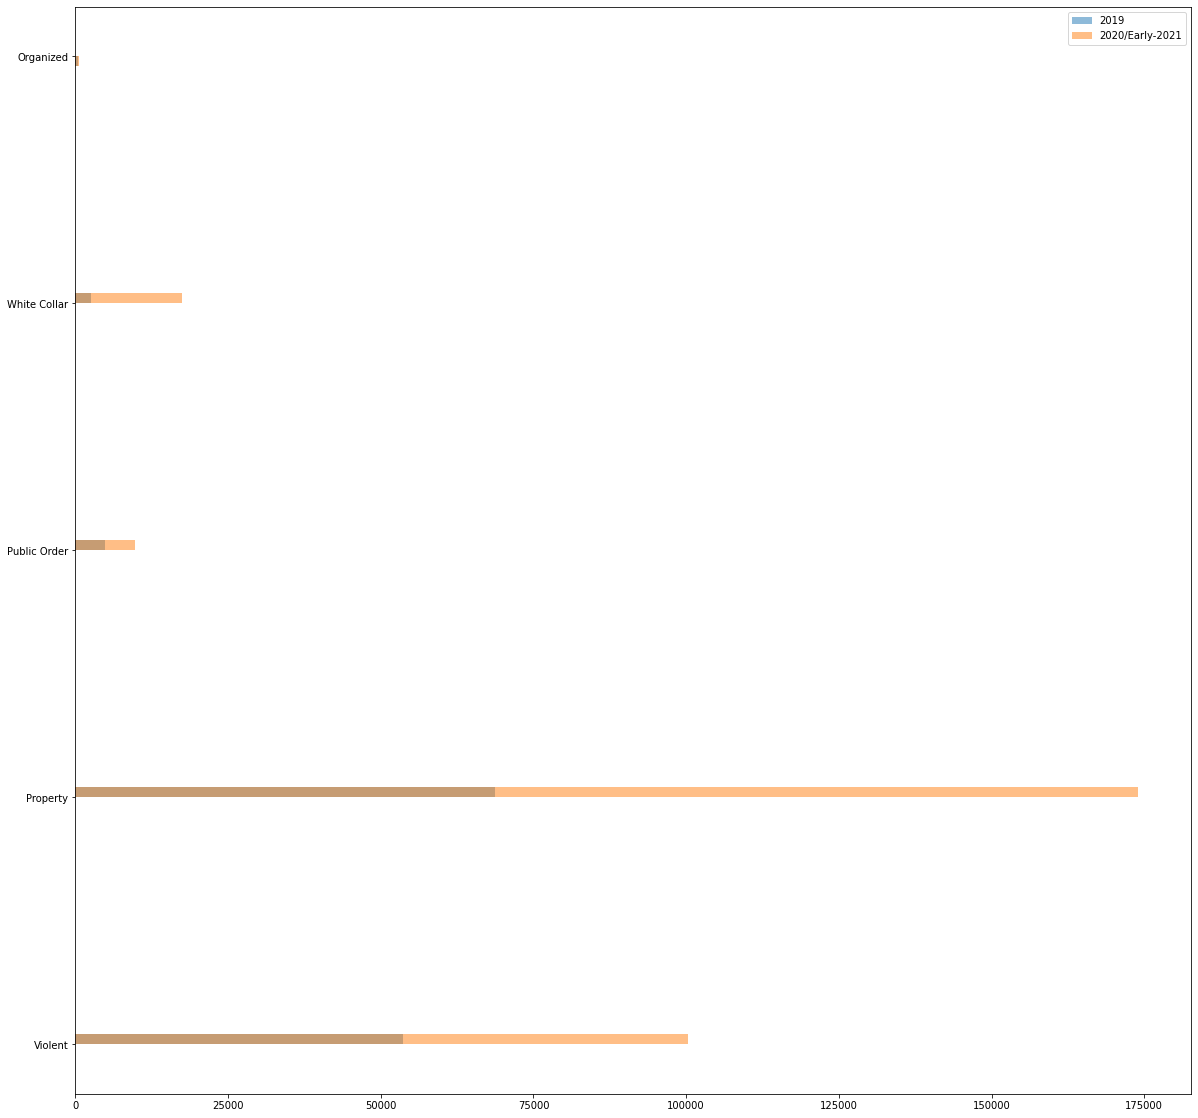

In [69]:
Nan_LA19Data1 = pd.read_csv('Updated_LA19_Data.csv')
clean_LA20Data1 = pd.read_csv('Updated_LA20_Data.csv')

NYear_2019 = Nan_LA19Data1['category']
NYear_2020_2021 = clean_LA20Data1['category']

bins = 100

plt.figure(figsize=(20, 20))
plt.hist(NYear_2019, bins, alpha=0.5, label='2019', orientation='horizontal')
plt.hist(NYear_2020_2021, bins, alpha=0.5, label='2020/Early-2021', orientation='horizontal')
plt.legend(loc='upper right')
plt.show()

In [75]:
file1 = open("copy_Updated_LA19_Data_copy.csv", "a")
file2 = open("copy_Updated_LA20_Data_copy.csv", "r")

for line in file2:
    file1.write(line)

file1.close()
file2.close()

geocoding based off of address. geographic space, where the crime occurs, locations that had an increase vs before covid. what kind of crime was it as well.